In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv()

In [3]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.columns


Index(['Date', 'Cow+AF8-ID', 'Activity', 'Session', 'Milk+AF8-Liters',
       'Feed+AF8-kg'],
      dtype='object')

In [ ]:
daily_summary = (
    df.groupby(["Date", "Cow+AF8-ID"])
    .agg({
        "Milk+AF8-Liters": "sum",
        "Feed+AF8-kg": "sum"
    })
    .reset_index()
    .sort_values(["Date", "Cow+AF8-ID"])
)


In [ ]:
# Read data
df = pd.read_csv("daily_cow_records_2025 18 OCT.csv", encoding='latin1')

# Replace weird +AC0- sequences with normal dashes
df["Date"] = df["Date"].astype(str).str.replace(r"\+AC0-", "-", regex=True)


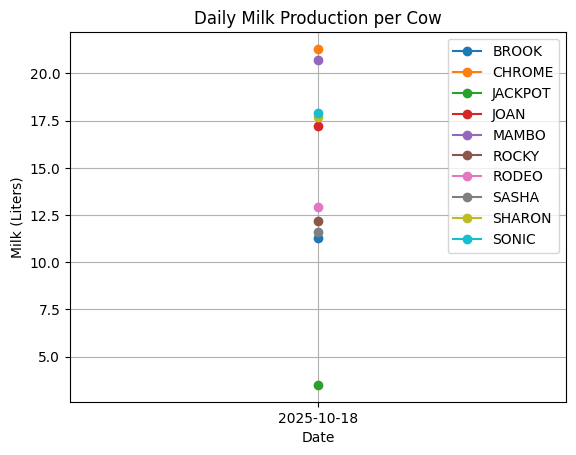

In [ ]:
for cow, data in daily_summary.groupby("Cow+AF8-ID"):
    plt.plot(data["Date"], data["Milk+AF8-Liters"], marker='o', label=cow)

plt.title("Daily Milk Production per Cow")
plt.xlabel("Date")
plt.ylabel("Milk (Liters)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
avg_milk = (
    daily_summary.groupby("Cow+AF8-ID")["Milk+AF8-Liters"]
    .mean()
    .sort_values(ascending=False)
)
print("Average daily milk per cow:")
print(avg_milk)


Average daily milk per cow:
Cow+AF8-ID
CHROME     21.3
MAMBO      20.7
SONIC      17.9
SHARON     17.7
JOAN       17.2
RODEO      12.9
ROCKY      12.2
SASHA      11.6
BROOK      11.3
JACKPOT     3.5
Name: Milk+AF8-Liters, dtype: float64


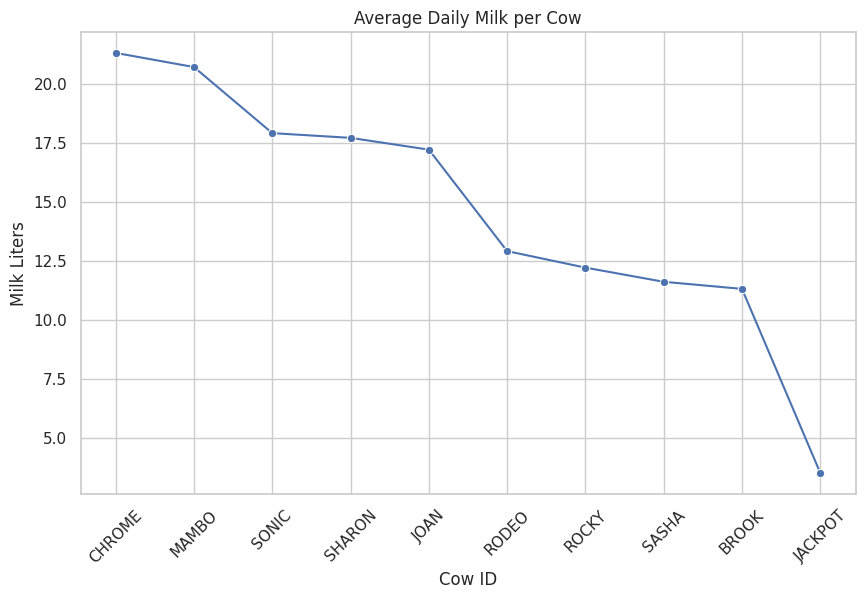

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_milk.index, y=avg_milk.values, marker='o')
plt.title("Average Daily Milk per Cow")
plt.xlabel("Cow ID")
plt.ylabel("Milk Liters")
plt.xticks(rotation=45)
plt.show()


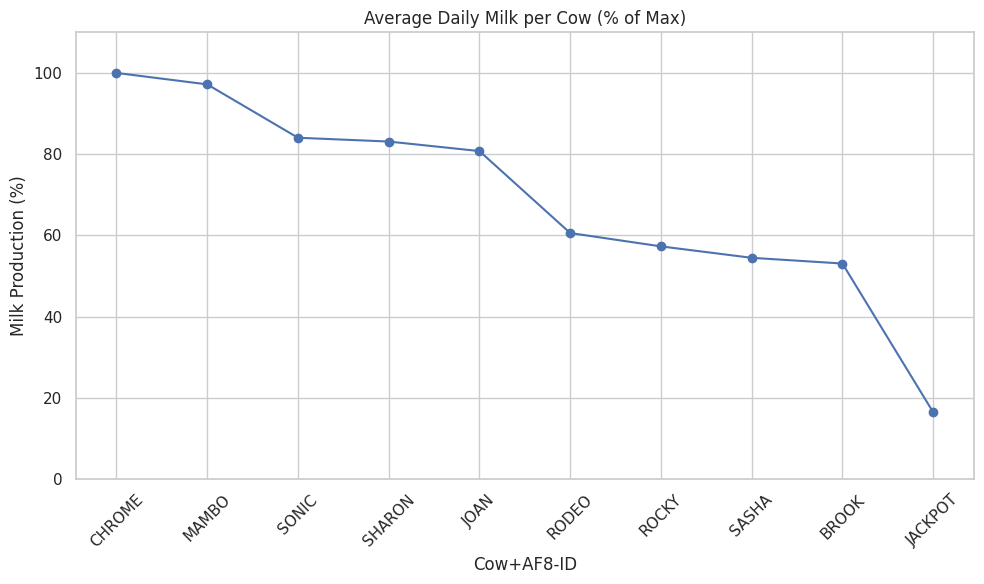

In [ ]:

# Percentage of max milk
milk_pct = (avg_milk / avg_milk.max()) * 100
#PLOT
plt.figure(figsize=(10, 6))
plt.plot(milk_pct.index, milk_pct.values, marker='o', linestyle='-')
plt.title("Average Daily Milk per Cow (% of Max)")
plt.xlabel("Cow+AF8-ID")
plt.ylabel("Milk Production (%)")
plt.ylim(0, 110)  # Slightly above 100% for visual clarity
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_313869/3657991829.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fcr = daily_summary.groupby('Cow+AF8-ID').apply(


<Axes: xlabel='Feed+AF8-kg', ylabel='Milk+AF8-Liters'>

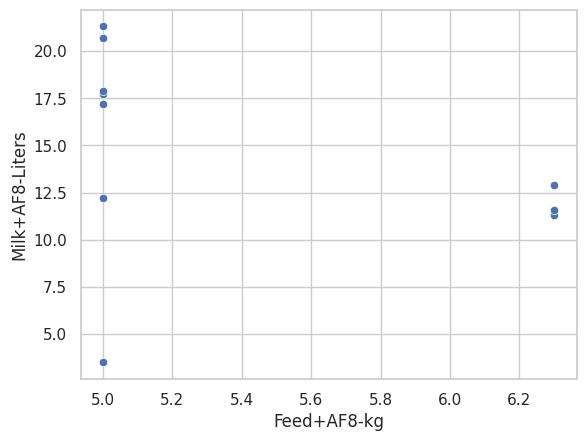

In [ ]:
fcr = daily_summary.groupby('Cow+AF8-ID').apply(
    lambda x: x['Feed+AF8-kg'].sum() / x['Milk+AF8-Liters'].sum()
)
# Lower FCR = more efficient cow
sns.scatterplot(
    data=daily_summary.groupby('Cow+AF8-ID').sum().reset_index(),
    x='Feed+AF8-kg', y='Milk+AF8-Liters'
)


In [ ]:
daily_summary[[ 'Feed+AF8-kg', 'Milk+AF8-Liters']].corr()


NameError: name 'daily_summary' is not defined